In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [316]:
df_train = pd.read_csv(r"C:\Users\handa\Downloads\titanic\train.csv")
df_test = pd.read_csv(r"C:\Users\handa\Downloads\titanic\test.csv")

In [317]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [318]:
### train dataset

In [319]:
df_train.shape

(891, 12)

In [320]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [321]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### DATA HANDLING

In [322]:
df_train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [323]:
df_train['cabin_num'] = df_train['Cabin'].str.extract(r'(\d+)') # captures the numerical part
df_train['cabin_cat'] = df_train['Cabin'].str.extract(r'([A-Z])')
#df_train = df_train.drop(columns='Cabin')

df_train['ticket_num'] = df_train['Ticket'].str.extract(r'(\d+)') # captures the numerical part
df_train['ticket_cat'] = df_train['Ticket'].str.extract(r'([A-Za-z]+)')
#df_train = df_train.drop(columns='Ticket')

In [324]:
df_train.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [325]:
def extract_title(name):
    # Split the name and return the title
    return name.split(', ')[-1].split(' ')[0]  # Get the title part

# Extract titles and create a new column
df_train['Title'] = df_train['Name'].apply(extract_title)

# Display the updated DataFrame
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_num,cabin_cat,ticket_num,ticket_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,5,A,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85,C,17599,PC,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,2,STON,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123,C,113803,NaN,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,373450,NaN,Mr.


In [326]:
df_train['Title'].value_counts()

Title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

In [327]:
df_train['Title_Bucket'] = df_train['Title'].replace(
    {
        "Dr.": "Officer",
        "Rev.": "Officer",
        "Col.": "Officer",
        "Major.": "Officer",
        "Capt.": "Officer",
        "Dona": "Aristocrat",
        "Jonkheer.": "Aristocrat",
        "Countess": "Aristocrat",
        "Sir.": "Aristocrat",
        "Lady.": "Aristocrat",
        "Don.": "Aristocrat",
        "Mlle.": "Miss",
        "Ms.": "Miss",
        "Mme.": "Mrs."
    },
    regex=True
)

# Rename the 'Title' values that should be Aristocrats
df_train['Title_Bucket'].replace({"the Aristocrat": "Aristocrat"}, inplace=True, regex=True)

# Insert a column named 'nameProcessed'
df_train['nameProcessed'] = df_train['Title_Bucket']


In [328]:
print(df_train[['Name', 'Title', 'Title_Bucket', 'nameProcessed']].head(12))


                                                 Name    Title Title_Bucket  \
0                             Braund, Mr. Owen Harris      Mr.          Mr.   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs.         Mrs.   
2                              Heikkinen, Miss. Laina    Miss.        Miss.   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs.         Mrs.   
4                            Allen, Mr. William Henry      Mr.          Mr.   
5                                    Moran, Mr. James      Mr.          Mr.   
6                             McCarthy, Mr. Timothy J      Mr.          Mr.   
7                      Palsson, Master. Gosta Leonard  Master.      Master.   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Mrs.         Mrs.   
9                 Nasser, Mrs. Nicholas (Adele Achem)     Mrs.         Mrs.   
10                    Sandstrom, Miss. Marguerite Rut    Miss.        Miss.   
11                           Bonnell, Miss. Elizabet

In [329]:
df_train.drop(columns=['Name', 'Title', 'Title_Bucket'], inplace=True)

In [330]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_num,cabin_cat,ticket_num,ticket_cat,nameProcessed
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,5,A,Mr.
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,85,C,17599,PC,Mrs.
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,2,STON,Miss.
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,123,C,113803,NaN,Mrs.
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,373450,NaN,Mr.


In [331]:
df_null = (df_train.isnull().mean() * 100).round(2)

In [332]:
print(df_null)

PassengerId       0.00
Survived          0.00
Pclass            0.00
Sex               0.00
Age              19.87
SibSp             0.00
Parch             0.00
Ticket            0.00
Fare              0.00
Cabin            77.10
Embarked          0.22
cabin_num        77.55
cabin_cat        77.10
ticket_num        0.45
ticket_cat       74.19
nameProcessed     0.00
dtype: float64


In [333]:
median_age = df_train['Age'].median()
df_train['Age'].fillna(median_age, inplace=True)

In [334]:
df_null = (df_train.isnull().mean() * 100).round(2)
print(df_null)

PassengerId       0.00
Survived          0.00
Pclass            0.00
Sex               0.00
Age               0.00
SibSp             0.00
Parch             0.00
Ticket            0.00
Fare              0.00
Cabin            77.10
Embarked          0.22
cabin_num        77.55
cabin_cat        77.10
ticket_num        0.45
ticket_cat       74.19
nameProcessed     0.00
dtype: float64


In [335]:
df_train.drop(columns=['Cabin', 'cabin_num', 'ticket_num', 'Ticket'], inplace=True)
df_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_cat,ticket_cat,nameProcessed
0,1,0,3,male,22.0,1,0,7.2500,S,NaN,A,Mr.
1,2,1,1,female,38.0,1,0,71.2833,C,C,PC,Mrs.
2,3,1,3,female,26.0,0,0,7.9250,S,NaN,STON,Miss.
3,4,1,1,female,35.0,1,0,53.1000,S,C,NaN,Mrs.
4,5,0,3,male,35.0,0,0,8.0500,S,NaN,NaN,Mr.
5,6,0,3,male,28.0,0,0,8.4583,Q,NaN,NaN,Mr.
6,7,0,1,male,54.0,0,0,51.8625,S,E,NaN,Mr.
7,8,0,3,male,2.0,3,1,21.0750,S,NaN,NaN,Master.
8,9,1,3,female,27.0,0,2,11.1333,S,NaN,NaN,Mrs.
9,10,1,2,female,14.0,1,0,30.0708,C,NaN,NaN,Mrs.


In [336]:
df_train.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           2
cabin_cat        687
ticket_cat       661
nameProcessed      0
dtype: int64

In [337]:
df_train.cabin_cat.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [338]:
df_train.fillna('X', inplace=True)

In [339]:
df_train.ticket_cat.unique()

array(['A', 'PC', 'STON', 'X', 'PP', 'C', 'SC', 'S', 'CA', 'SO', 'W',
       'SOTON', 'Fa', 'LINE', 'F', 'SW', 'SCO', 'P', 'WE'], dtype=object)

# EDA

In [340]:
df_num = df_train[['Age','SibSp','Parch','Fare']]
df_cat = df_train[['Survived','Pclass','Sex','ticket_cat','cabin_cat','Embarked']]

            Age     SibSp     Parch      Fare
Age    1.000000 -0.233296 -0.172482  0.096688
SibSp -0.233296  1.000000  0.414838  0.159651
Parch -0.172482  0.414838  1.000000  0.216225
Fare   0.096688  0.159651  0.216225  1.000000


<Axes: >

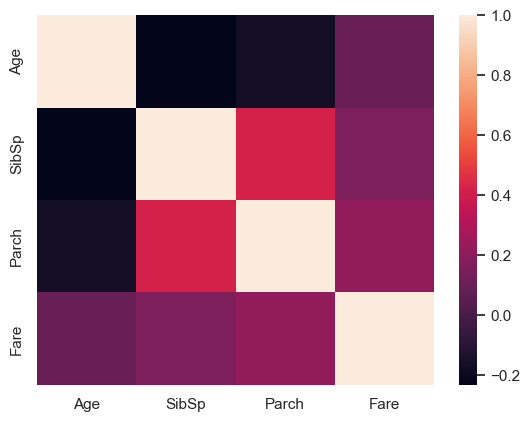

In [341]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [342]:
## univariate analysis

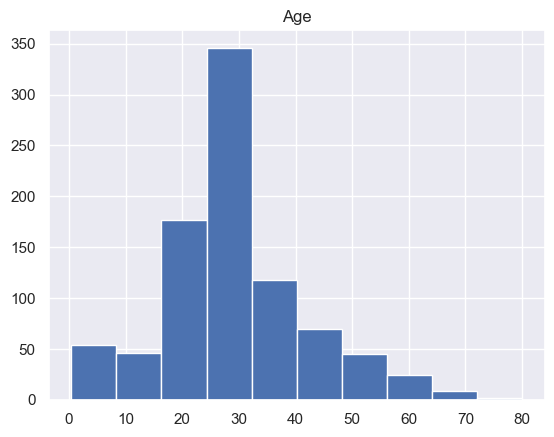

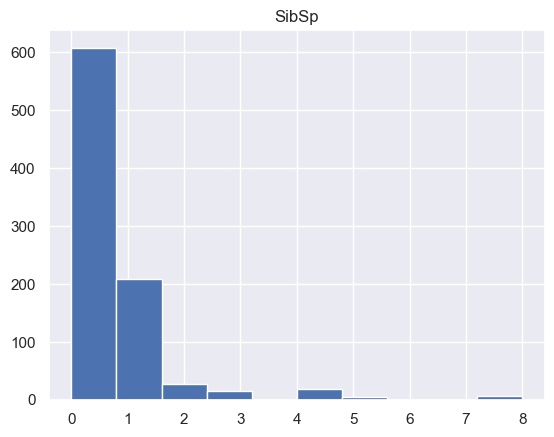

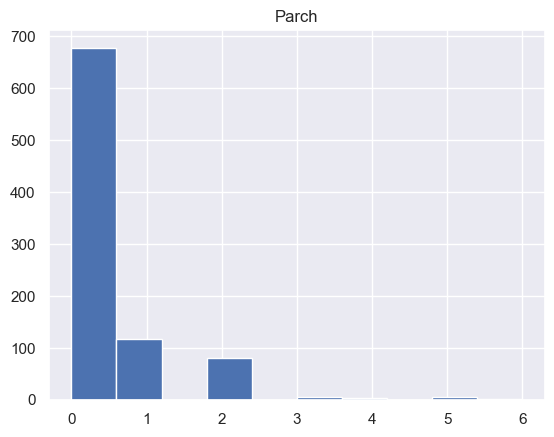

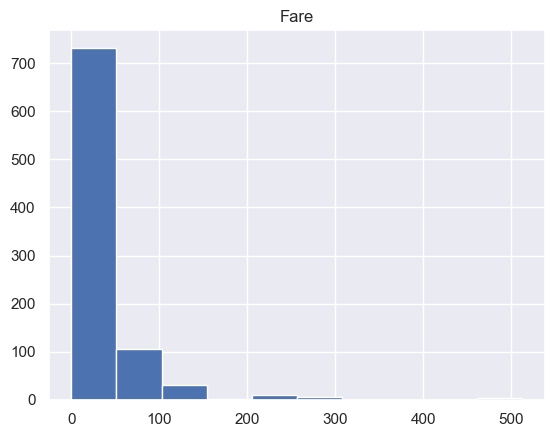

In [343]:
for i in df_num:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [344]:
df_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

       PassengerId    Survived      Pclass         Age       SibSp  \
count   446.000000  446.000000  446.000000  446.000000  446.000000   
mean    434.719731    0.378924    2.421525   28.875000    0.448430   
std     259.012073    0.485664    0.688188   13.246595    0.793674   
min       3.000000    0.000000    1.000000    0.420000    0.000000   
25%     207.250000    0.000000    2.000000   22.000000    0.000000   
50%     432.500000    0.000000    3.000000   28.000000    0.000000   
75%     652.750000    1.000000    3.000000   35.000000    1.000000   
max     890.000000    1.000000    3.000000   80.000000    4.000000   

            Parch        Fare  
count  446.000000  446.000000  
mean     0.354260   16.679017  
std      0.731363    7.438402  
min      0.000000    7.925000  
25%      0.000000    9.842725  
50%      0.000000   14.454200  
75%      0.000000   25.137525  
max      5.000000   31.000000  


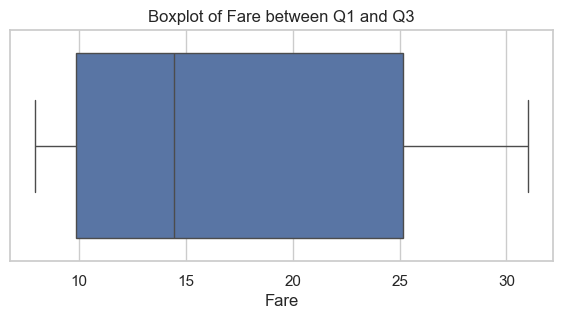

In [345]:
# Calculate Q1 and Q3
Q1 = df_train['Fare'].quantile(0.25)
Q3 = df_train['Fare'].quantile(0.75)

# Filter the DataFrame for values between Q1 and Q3
filtered_df = df_train[(df_train['Fare'] >= Q1) & (df_train['Fare'] <= Q3)]

# Display descriptive statistics for the filtered data
print(filtered_df.describe())

# Set the style
sns.set(style="whitegrid")

# Create the boxplot for values between Q1 and Q3
plt.figure(figsize=(7, 3))
sns.boxplot(x='Fare', data=filtered_df)
plt.title("Boxplot of Fare between Q1 and Q3")
plt.xlabel("Fare")

plt.show()

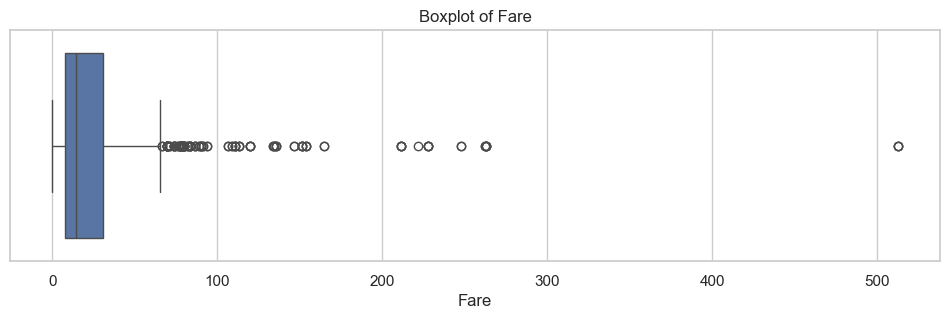

In [346]:
## gives outliers 
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(12, 3))
sns.boxplot(x='Fare', data=df_train)
plt.title("Boxplot of Fare")
plt.xlabel("Fare")

plt.show()

In [347]:
df_train = df_train[df_train['Fare'] <= 300]

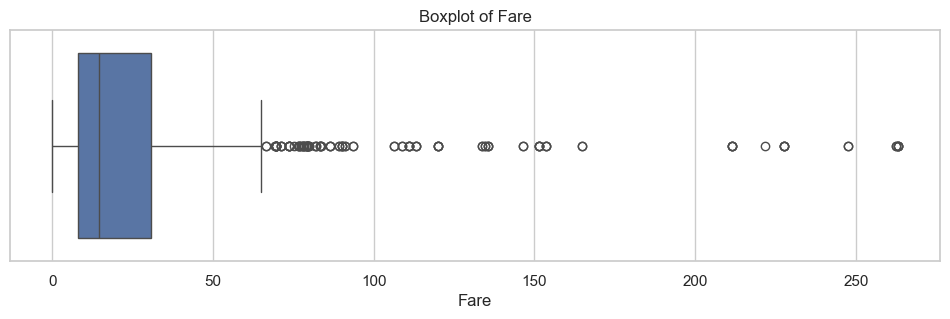

In [348]:
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(12, 3))
sns.boxplot(x='Fare', data=df_train)
plt.title("Boxplot of Fare")
plt.xlabel("Fare")

plt.show()

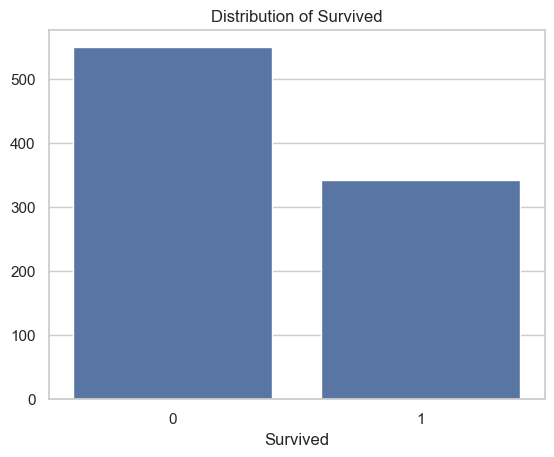

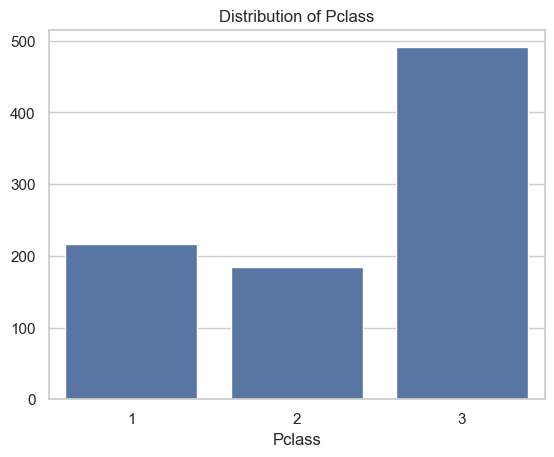

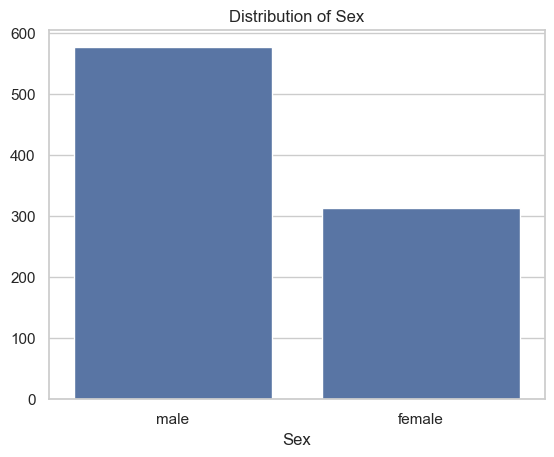

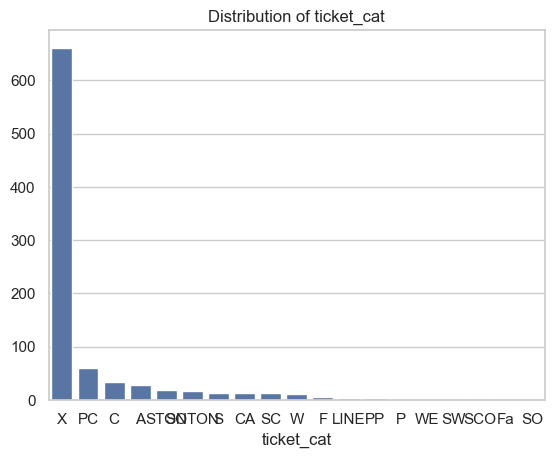

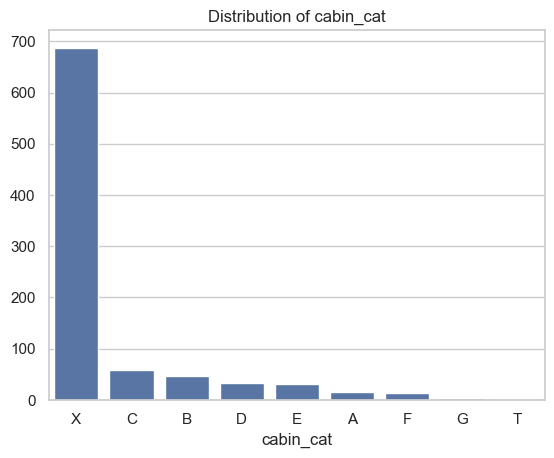

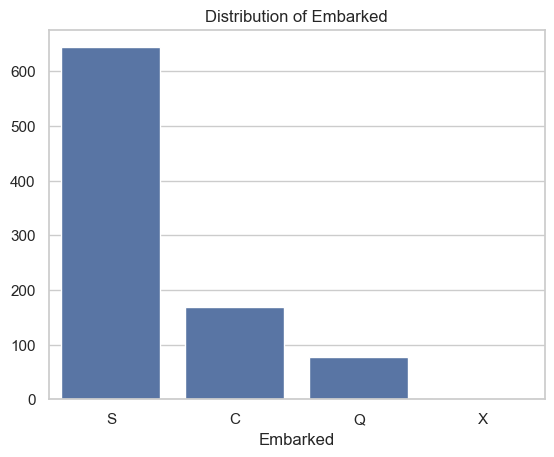

In [349]:
for i in df_cat.columns:
    value_counts = df_cat[i].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {i}')
    plt.show()

In [350]:
## BIVARIATE ANALYSIS

In [351]:
# Define the bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']

# Bin the Age column and overwrite it
df_train['Age_Binned'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
print(df_train)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female  28.0      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked cabin_cat ticket_cat nameProcessed Age_Binned  
0          S         X          A     

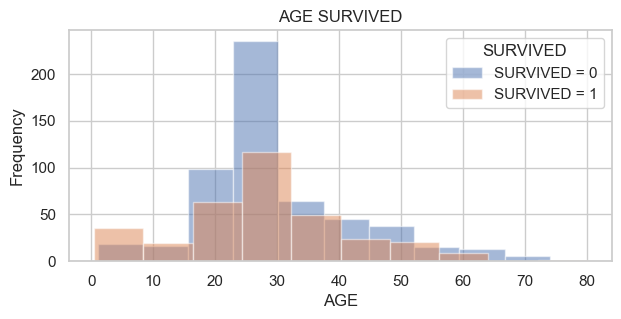

In [352]:
sns.set(style="whitegrid")
plt.figure(figsize=(7, 3))

# Histogram for df
plt.hist(df_train[df_train["Survived"] == 0]["Age"], alpha= 0.5,label="SURVIVED = 0")
plt.hist(df_train[df_train["Survived"] == 1]["Age"], alpha=0.5,label="SURVIVED = 1")
plt.title("AGE SURVIVED")
plt.xlabel("AGE")
plt.ylabel("Frequency")
plt.legend(title="SURVIVED")

plt.show()

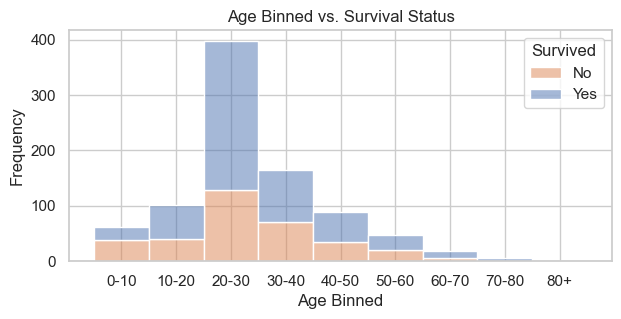

In [353]:
# Set the style
sns.set(style="whitegrid")
plt.figure(figsize=(7, 3))

# Create histogram for binned Age
sns.histplot(data=df_train, x='Age_Binned', hue='Survived', multiple='stack', stat='count', alpha=0.5)

# Customize the plot
plt.title("Age Binned vs. Survival Status")
plt.xlabel("Age Binned")
plt.ylabel("Frequency")
plt.legend(title="Survived", labels=['No', 'Yes'])

# Show the plot
plt.show()

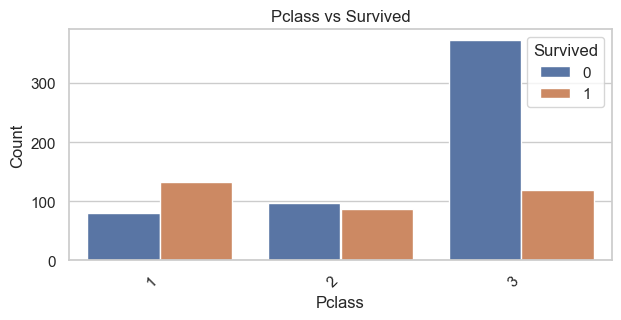

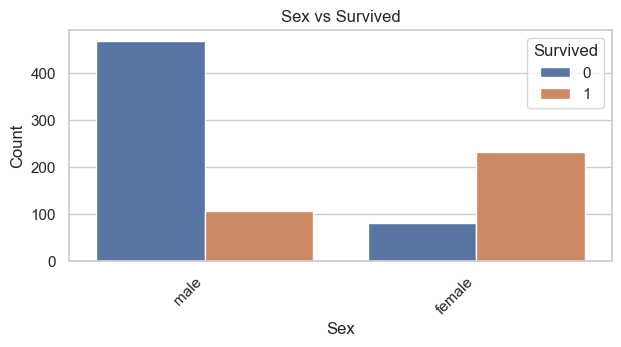

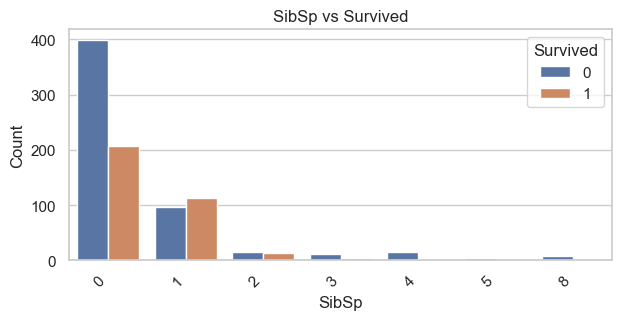

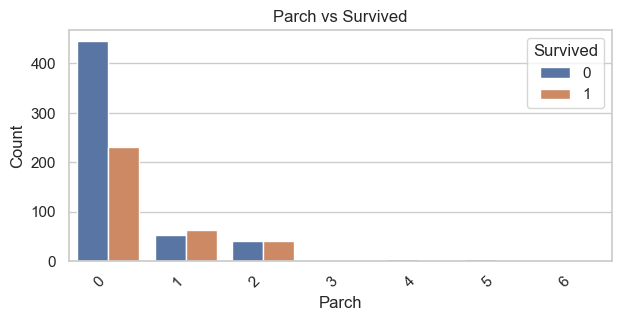

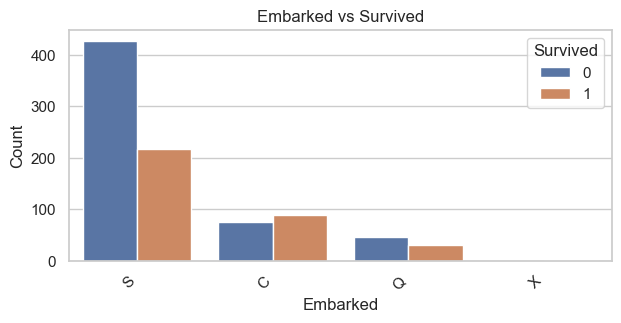

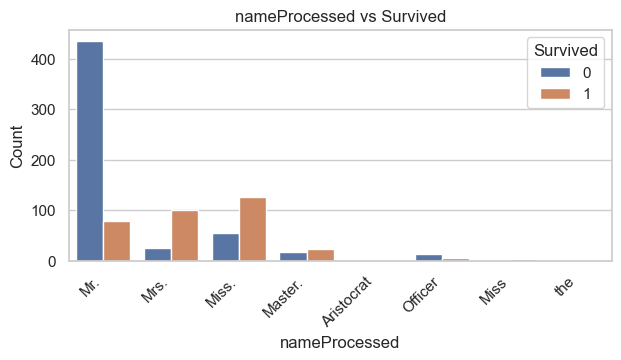

In [354]:
# Set the aesthetics for the plots  
sns.set(style="whitegrid")  

# List of columns to plot  
columns_to_plot = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "nameProcessed"]  # Add more columns as needed  

# Create a loop to generate count plots  
for column in columns_to_plot:  
    plt.figure(figsize=(7, 3))  # Set the size of the figure  
    sns.countplot(x=column, hue="Survived", data=df_train)  
    plt.title(f"{column} vs Survived")  
    plt.xlabel(column)  
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Survived")  
    plt.show()

In [355]:
# Define the bins and labels
bins = [0, 50, 100, 150, 200, 250, 300]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300']

# Bin the Fare column
df_train['Fare_Binned'] = pd.cut(df_train['Fare'], bins=bins, labels=labels, right=False)


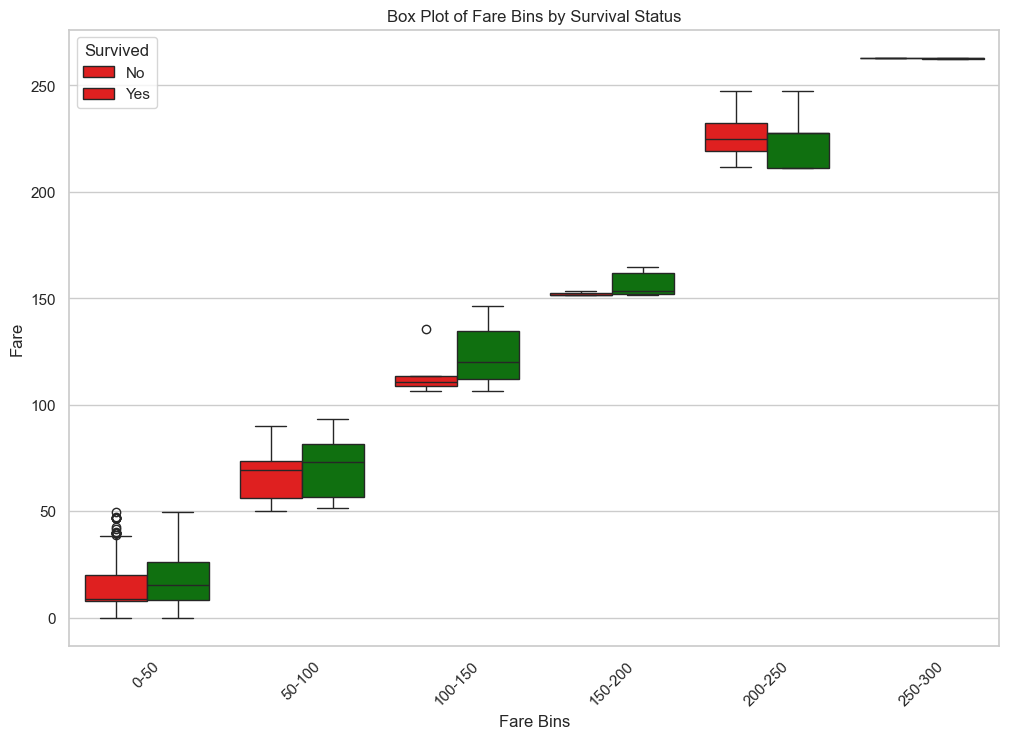

In [356]:
# Set the style
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Fare_Binned', y='Fare', hue='Survived', data=df_train, palette={0: 'red', 1: 'green'}, dodge=True)

plt.title("Box Plot of Fare Bins by Survival Status")
plt.xlabel("Fare Bins")
plt.ylabel("Fare")
plt.legend(title='Survived', loc='upper left', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

In [357]:
## MULTIVARIATE ANALYSIS 

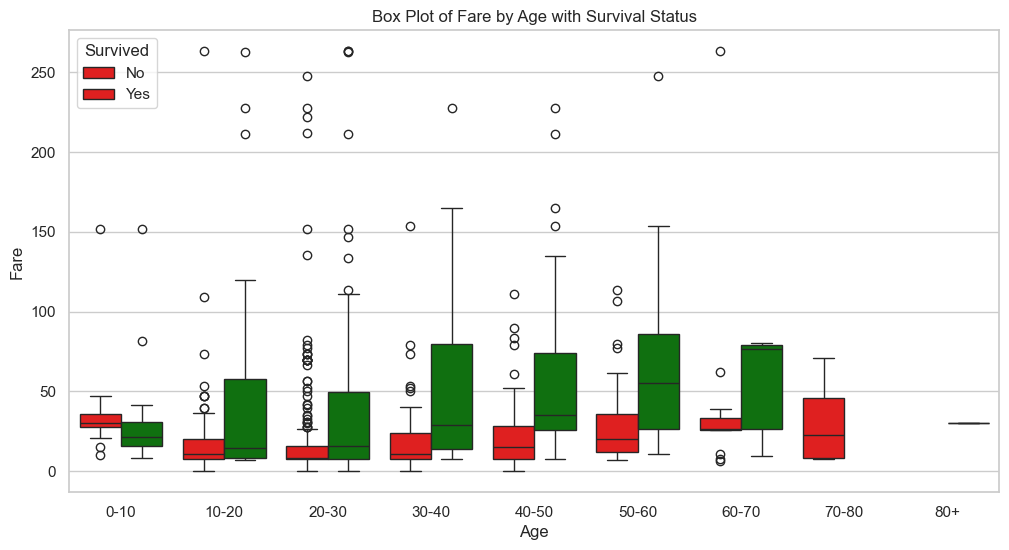

In [358]:
# Set the style
sns.set(style="whitegrid")

# Create the box plot for Age vs. Fare with hue as Survived
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Binned', y='Fare', hue='Survived', data=df_train, palette={0: 'red', 1: 'green'}, dodge=True)

plt.title("Box Plot of Fare by Age with Survival Status")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title='Survived', loc='upper left', labels=['No', 'Yes'])
plt.show()

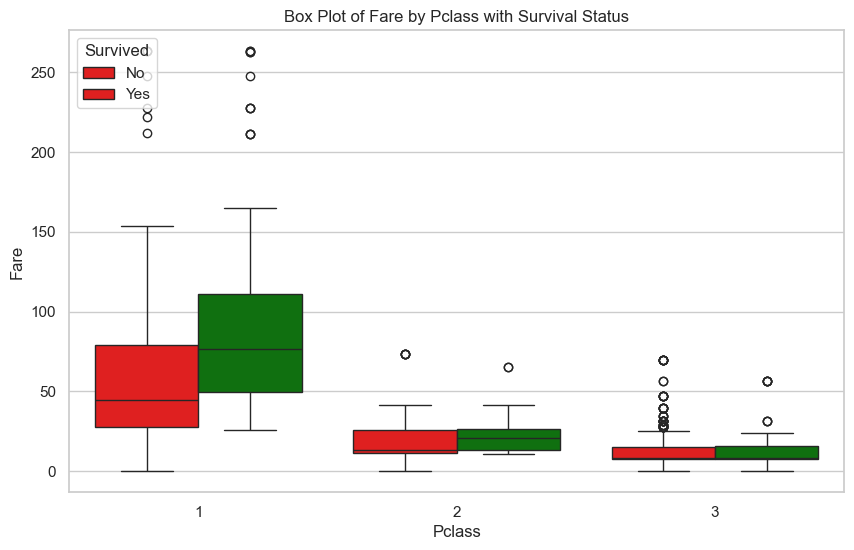

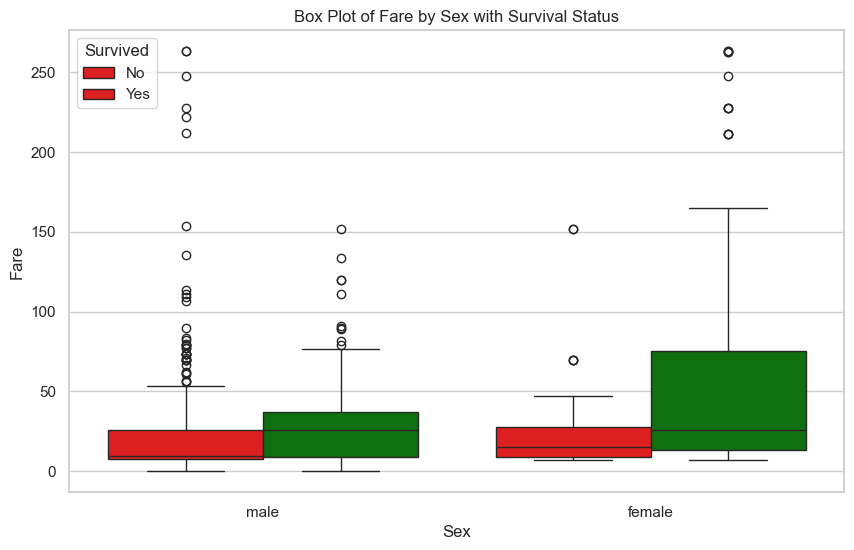

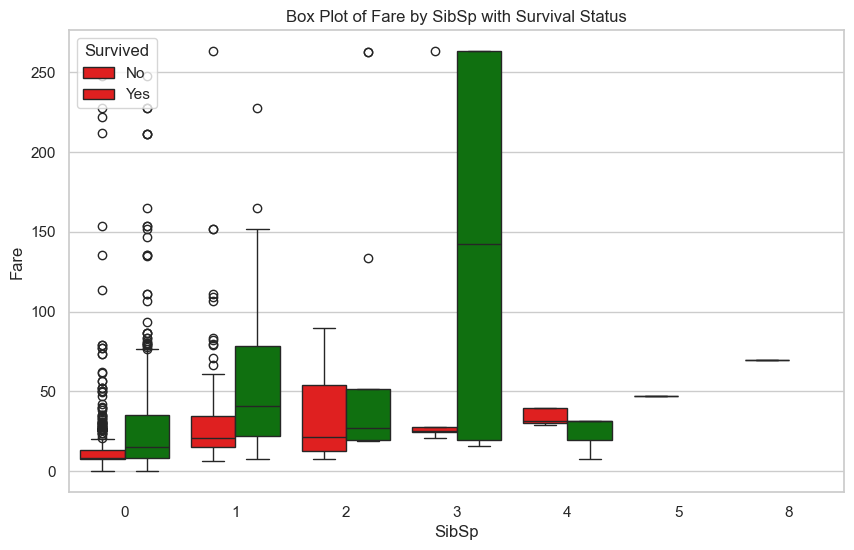

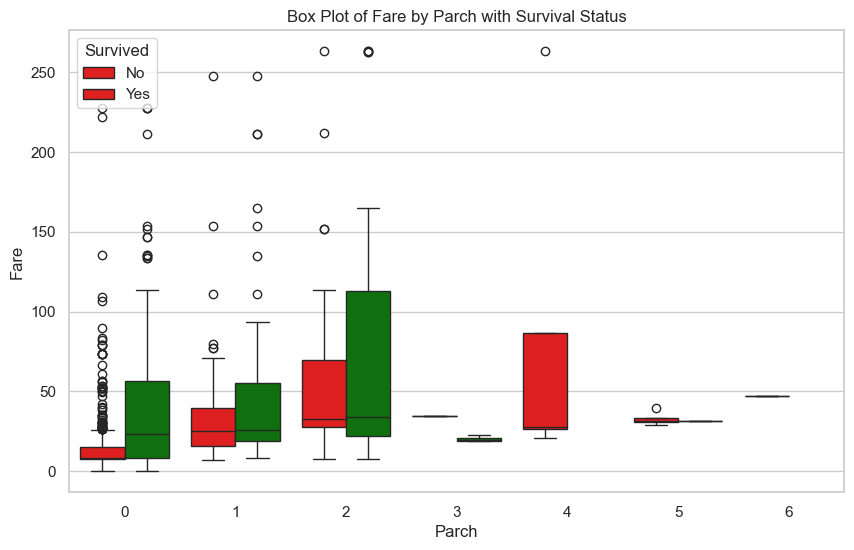

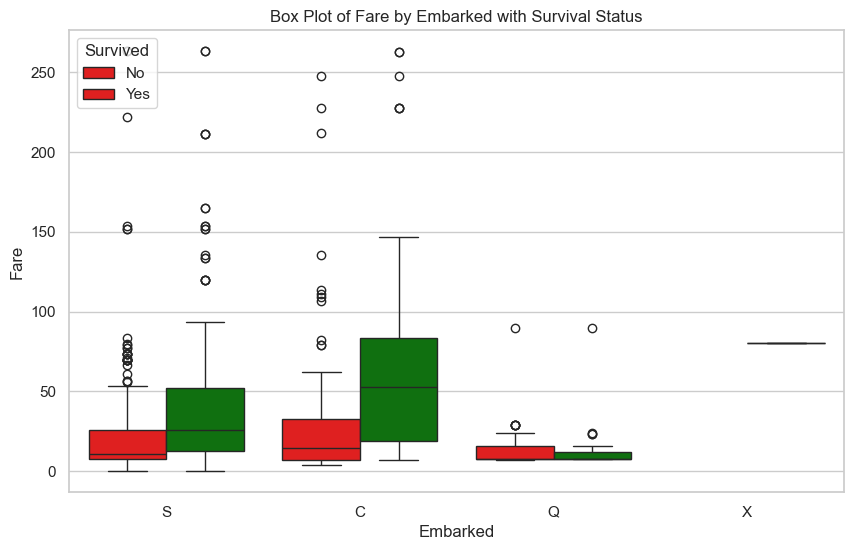

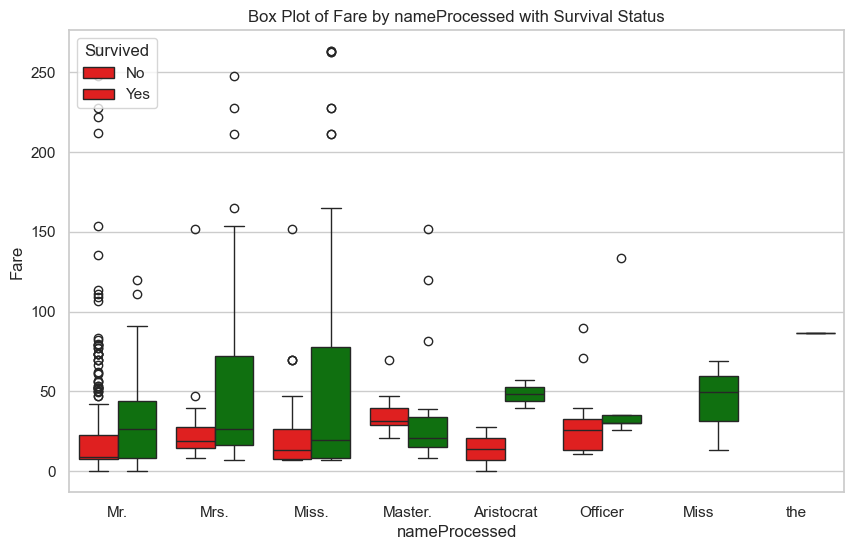

In [359]:
sns.set(style="whitegrid")

# List of columns to loop through
columns = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "nameProcessed"]

# Loop through each column and create a box plot
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='Fare', hue='Survived', data=df_train, palette={0: 'red', 1: 'green'}, dodge=True)
    
    plt.title(f"Box Plot of Fare by {column} with Survival Status")
    plt.xlabel(column)
    plt.ylabel("Fare")
    plt.legend(title='Survived', loc='upper left', labels=['No', 'Yes'])
    plt.show()

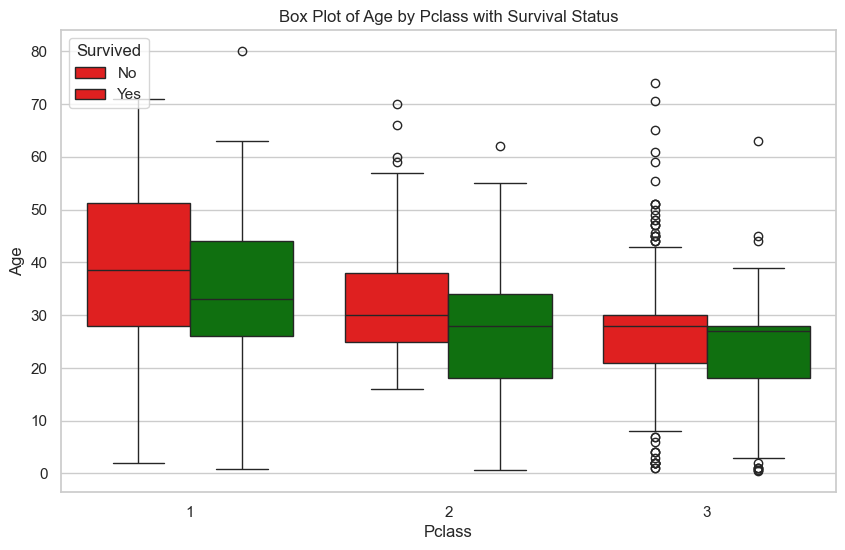

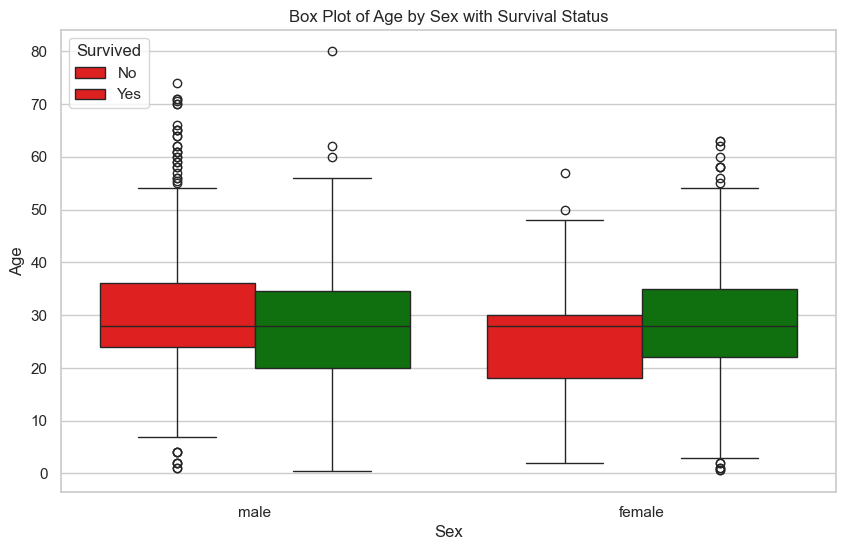

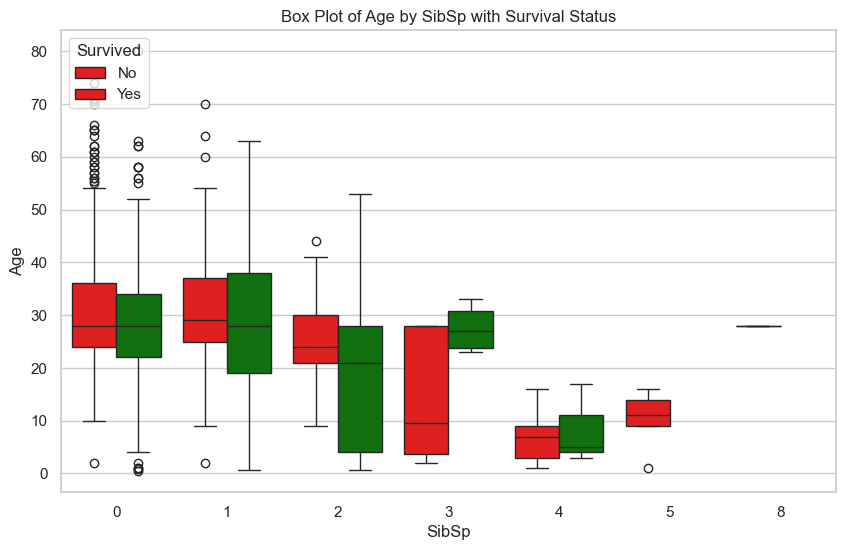

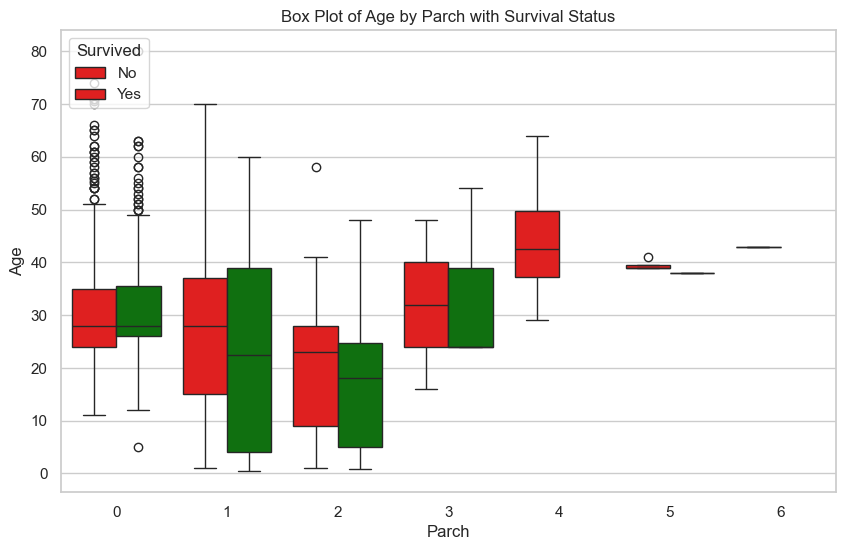

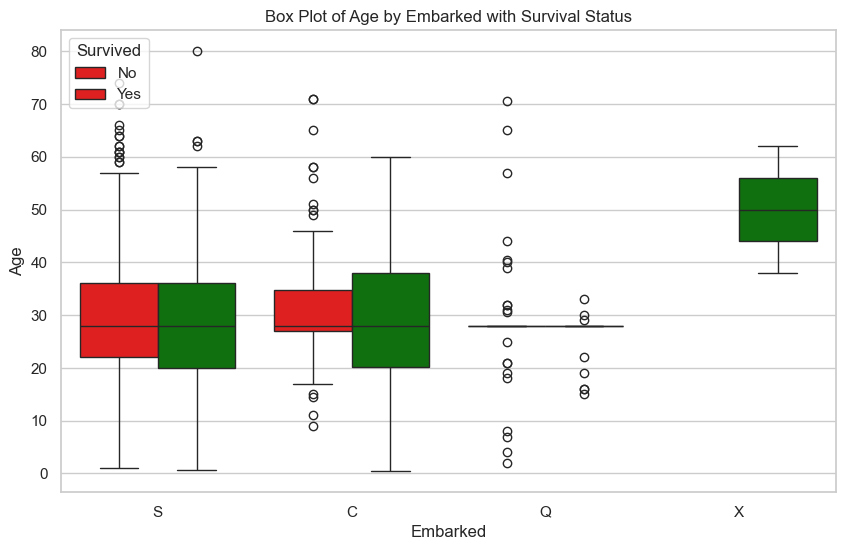

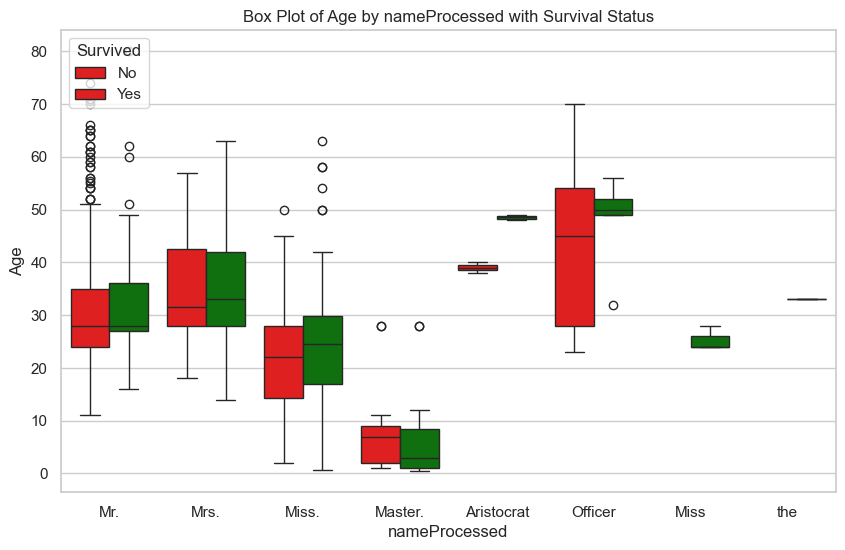

In [360]:
sns.set(style="whitegrid")

# List of columns to loop through
columns = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "nameProcessed"]

# Loop through each column and create a box plot
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='Age', hue='Survived', data=df_train, palette={0: 'red', 1: 'green'}, dodge=True)
    
    plt.title(f"Box Plot of Age by {column} with Survival Status")
    plt.xlabel(column)
    plt.ylabel("Age")
    plt.legend(title='Survived', loc='upper left', labels=['No', 'Yes'])
    plt.show()

In [361]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    888 non-null    int64   
 1   Survived       888 non-null    int64   
 2   Pclass         888 non-null    int64   
 3   Sex            888 non-null    object  
 4   Age            888 non-null    float64 
 5   SibSp          888 non-null    int64   
 6   Parch          888 non-null    int64   
 7   Fare           888 non-null    float64 
 8   Embarked       888 non-null    object  
 9   cabin_cat      888 non-null    object  
 10  ticket_cat     888 non-null    object  
 11  nameProcessed  888 non-null    object  
 12  Age_Binned     888 non-null    category
 13  Fare_Binned    888 non-null    category
dtypes: category(2), float64(2), int64(5), object(5)
memory usage: 92.5+ KB


##### handling test set

In [362]:
df_test.shape

(418, 11)

In [363]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [364]:
median_age = df_test['Age'].median()
df_test['Age'].fillna(median_age, inplace=True)

In [365]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [366]:
df_test['cabin_num'] = df_test['Cabin'].str.extract(r'(\d+)') # captures the numerical part
df_test['cabin_cat'] = df_test['Cabin'].str.extract(r'([A-Z])')
#df_train = df_train.drop(columns='Cabin')

df_test['ticket_num'] = df_test['Ticket'].str.extract(r'(\d+)') # captures the numerical part
df_test['ticket_cat'] = df_test['Ticket'].str.extract(r'([A-Za-z]+)')
#df_train = df_train.drop(columns='Ticket')

In [367]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  cabin_num    89 non-null     object 
 12  cabin_cat    91 non-null     object 
 13  ticket_num   418 non-null    object 
 14  ticket_cat   122 non-null    object 
dtypes: float64(2), int64(4), object(9)
memory usage: 49.1+ KB


In [368]:
df_test.cabin_cat.unique()

array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [369]:
df_test.fillna('X', inplace=True)

In [370]:
df_test.cabin_cat.unique()

array(['X', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [371]:
df_test.ticket_cat.unique()

array(['X', 'A', 'W', 'SC', 'STON', 'PC', 'C', 'SOTON', 'F', 'PP', 'CA',
       'S', 'AQ', 'LP'], dtype=object)

In [372]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    object 
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  cabin_num    418 non-null    object 
 12  cabin_cat    418 non-null    object 
 13  ticket_num   418 non-null    object 
 14  ticket_cat   418 non-null    object 
dtypes: float64(1), int64(4), object(10)
memory usage: 49.1+ KB


In [373]:
df_train = df_train.drop(columns=['Cabin', 'Ticket', 'ticket_num', 'cabin_num'], errors='ignore')



In [374]:
df_test = df_test.drop(columns=['Cabin', 'Ticket', 'ticket_num', 'cabin_num'])

In [375]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    888 non-null    int64   
 1   Survived       888 non-null    int64   
 2   Pclass         888 non-null    int64   
 3   Sex            888 non-null    object  
 4   Age            888 non-null    float64 
 5   SibSp          888 non-null    int64   
 6   Parch          888 non-null    int64   
 7   Fare           888 non-null    float64 
 8   Embarked       888 non-null    object  
 9   cabin_cat      888 non-null    object  
 10  ticket_cat     888 non-null    object  
 11  nameProcessed  888 non-null    object  
 12  Age_Binned     888 non-null    category
 13  Fare_Binned    888 non-null    category
dtypes: category(2), float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [376]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    object 
 8   Embarked     418 non-null    object 
 9   cabin_cat    418 non-null    object 
 10  ticket_cat   418 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 36.1+ KB


In [377]:
df_test.Name.unique()

array(['Kelly, Mr. James', 'Wilkes, Mrs. James (Ellen Needs)',
       'Myles, Mr. Thomas Francis', 'Wirz, Mr. Albert',
       'Hirvonen, Mrs. Alexander (Helga E Lindqvist)',
       'Svensson, Mr. Johan Cervin', 'Connolly, Miss. Kate',
       'Caldwell, Mr. Albert Francis',
       'Abrahim, Mrs. Joseph (Sophie Halaut Easu)',
       'Davies, Mr. John Samuel', 'Ilieff, Mr. Ylio',
       'Jones, Mr. Charles Cresson',
       'Snyder, Mrs. John Pillsbury (Nelle Stevenson)',
       'Howard, Mr. Benjamin',
       'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)',
       'del Carlo, Mrs. Sebastiano (Argenia Genovesi)',
       'Keane, Mr. Daniel', 'Assaf, Mr. Gerios',
       'Ilmakangas, Miss. Ida Livija',
       'Assaf Khalil, Mrs. Mariana (Miriam")"', 'Rothschild, Mr. Martin',
       'Olsen, Master. Artur Karl',
       'Flegenheim, Mrs. Alfred (Antoinette)',
       'Williams, Mr. Richard Norris II',
       'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)',
       'Robins, Mr. Alexander

In [378]:
def extract_title(name):
    # Split the name and return the title
    return name.split(', ')[-1].split(' ')[0]  # Get the title part

# Extract titles and create a new column
df_test['Title'] = df_test['Name'].apply(extract_title)

# Display the updated DataFrame
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_cat,ticket_cat,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,X,X,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0,S,X,X,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,X,X,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,X,X,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,X,X,Mrs.


In [379]:
df_test['Title_Bucket'] = df_test['Title'].replace(
    {
        "Dr.": "Officer",
        "Rev.": "Officer",
        "Col.": "Officer",
        "Major.": "Officer",
        "Capt.": "Officer",
        "Dona": "Aristocrat",
        "Jonkheer.": "Aristocrat",
        "Countess": "Aristocrat",
        "Sir.": "Aristocrat",
        "Lady.": "Aristocrat",
        "Don.": "Aristocrat",
        "Mlle.": "Miss",
        "Ms.": "Miss",
        "Mme.": "Mrs."
    },
    regex=True
)

# Rename the 'Title' values that should be Aristocrats
df_test['Title_Bucket'].replace({"the Aristocrat": "Aristocrat"}, inplace=True, regex=True)

# Insert a column named 'nameProcessed'
df_test['nameProcessed'] = df_test['Title_Bucket']

In [380]:
print(df_test[['Name', 'Title', 'Title_Bucket', 'nameProcessed']].head(12))

                                            Name  Title Title_Bucket  \
0                               Kelly, Mr. James    Mr.          Mr.   
1               Wilkes, Mrs. James (Ellen Needs)   Mrs.         Mrs.   
2                      Myles, Mr. Thomas Francis    Mr.          Mr.   
3                               Wirz, Mr. Albert    Mr.          Mr.   
4   Hirvonen, Mrs. Alexander (Helga E Lindqvist)   Mrs.         Mrs.   
5                     Svensson, Mr. Johan Cervin    Mr.          Mr.   
6                           Connolly, Miss. Kate  Miss.        Miss.   
7                   Caldwell, Mr. Albert Francis    Mr.          Mr.   
8      Abrahim, Mrs. Joseph (Sophie Halaut Easu)   Mrs.         Mrs.   
9                        Davies, Mr. John Samuel    Mr.          Mr.   
10                              Ilieff, Mr. Ylio    Mr.          Mr.   
11                    Jones, Mr. Charles Cresson    Mr.          Mr.   

   nameProcessed  
0            Mr.  
1           Mrs.  
2     

In [381]:
df_test.drop(columns=['Name', 'Title', 'Title_Bucket'], inplace=True)

In [382]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Sex            418 non-null    object 
 3   Age            418 non-null    float64
 4   SibSp          418 non-null    int64  
 5   Parch          418 non-null    int64  
 6   Fare           418 non-null    object 
 7   Embarked       418 non-null    object 
 8   cabin_cat      418 non-null    object 
 9   ticket_cat     418 non-null    object 
 10  nameProcessed  418 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 36.1+ KB


In [383]:
df_test.Fare.unique()

array([7.8292, 7.0, 9.6875, 8.6625, 12.2875, 9.225, 7.6292, 29.0, 7.2292,
       24.15, 7.8958, 26.0, 82.2667, 61.175, 27.7208, 12.35, 7.225, 7.925,
       59.4, 3.1708, 31.6833, 61.3792, 262.375, 14.5, 61.9792, 30.5,
       21.6792, 31.5, 20.575, 23.45, 57.75, 8.05, 9.5, 56.4958, 13.4167,
       26.55, 7.85, 13.0, 52.5542, 29.7, 7.75, 76.2917, 15.9, 60.0,
       15.0333, 23.0, 263.0, 15.5792, 29.125, 7.65, 16.1, 13.5, 7.725,
       21.0, 7.8792, 42.4, 28.5375, 211.5, 25.7, 15.2458, 221.7792,
       10.7083, 14.4542, 13.9, 7.775, 52.0, 7.7958, 78.85, 7.8542,
       55.4417, 8.5167, 22.525, 7.8208, 8.7125, 15.0458, 7.7792, 31.6792,
       7.2833, 6.4375, 16.7, 75.2417, 15.75, 7.25, 23.25, 28.5, 25.4667,
       46.9, 151.55, 18.0, 51.8625, 83.1583, 'X', 12.1833, 31.3875, 7.55,
       13.775, 7.7333, 22.025, 50.4958, 34.375, 8.9625, 39.0, 36.75, 53.1,
       247.5208, 16.0, 69.55, 32.5, 134.5, 10.5, 8.1125, 15.5, 14.4,
       227.525, 25.7417, 7.05, 73.5, 42.5, 164.8667, 13.8583, 27.4458,

In [384]:
df_test['Fare'] = df_test['Fare'].replace('X', 0) ##considering one's who paid no fare were the titanic staff

# Convert the 'Fare' column to float
df_test['Fare'] = df_test['Fare'].astype(float)

In [385]:
# Define the bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']

# Bin the Age column and overwrite it
df_test['Age_Binned'] = pd.cut(df_test['Age'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame
print(df_test)

     PassengerId  Pclass     Sex   Age  SibSp  Parch      Fare Embarked  \
0            892       3    male  34.5      0      0    7.8292        Q   
1            893       3  female  47.0      1      0    7.0000        S   
2            894       2    male  62.0      0      0    9.6875        Q   
3            895       3    male  27.0      0      0    8.6625        S   
4            896       3  female  22.0      1      1   12.2875        S   
..           ...     ...     ...   ...    ...    ...       ...      ...   
413         1305       3    male  27.0      0      0    8.0500        S   
414         1306       1  female  39.0      0      0  108.9000        C   
415         1307       3    male  38.5      0      0    7.2500        S   
416         1308       3    male  27.0      0      0    8.0500        S   
417         1309       3    male  27.0      1      1   22.3583        C   

    cabin_cat ticket_cat nameProcessed Age_Binned  
0           X          X           Mr.      30-

In [386]:
# Define the bins and labels
bins = [0, 50, 100, 150, 200, 250, 300]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300']

# Bin the Fare column
df_test['Fare_Binned'] = pd.cut(df_test['Fare'], bins=bins, labels=labels, right=False)
print(df_test)

     PassengerId  Pclass     Sex   Age  SibSp  Parch      Fare Embarked  \
0            892       3    male  34.5      0      0    7.8292        Q   
1            893       3  female  47.0      1      0    7.0000        S   
2            894       2    male  62.0      0      0    9.6875        Q   
3            895       3    male  27.0      0      0    8.6625        S   
4            896       3  female  22.0      1      1   12.2875        S   
..           ...     ...     ...   ...    ...    ...       ...      ...   
413         1305       3    male  27.0      0      0    8.0500        S   
414         1306       1  female  39.0      0      0  108.9000        C   
415         1307       3    male  38.5      0      0    7.2500        S   
416         1308       3    male  27.0      0      0    8.0500        S   
417         1309       3    male  27.0      1      1   22.3583        C   

    cabin_cat ticket_cat nameProcessed Age_Binned Fare_Binned  
0           X          X           

In [387]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    418 non-null    int64   
 1   Pclass         418 non-null    int64   
 2   Sex            418 non-null    object  
 3   Age            418 non-null    float64 
 4   SibSp          418 non-null    int64   
 5   Parch          418 non-null    int64   
 6   Fare           418 non-null    float64 
 7   Embarked       418 non-null    object  
 8   cabin_cat      418 non-null    object  
 9   ticket_cat     418 non-null    object  
 10  nameProcessed  418 non-null    object  
 11  Age_Binned     418 non-null    category
 12  Fare_Binned    417 non-null    category
dtypes: category(2), float64(2), int64(4), object(5)
memory usage: 37.4+ KB


## MODELS

#### LOGISTIC REGRESSION

In [388]:
# 1. Preprocessing

# One-hot encode categorical variables (Sex, Embarked, cabin_cat, ticket_cat, nameProcessed)
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked', 'cabin_cat', 'ticket_cat', 'nameProcessed'], drop_first=True)

# 2. Define Features and Target
X = df_train.drop(columns=['Survived', 'PassengerId', 'Age_Binned', 'Fare_Binned'])  # Features
y = df_train['Survived']  # Target variable

# 3. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [389]:
scaler = RobustScaler()

# Fit and transform the training data and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [390]:

# 4. Train the Model
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [391]:
##survival rate 
survival = (sum(df_train['Survived'])/len(df_train['Survived'].index))*100
survival

38.17567567567568

In [392]:
# 5. Evaluate the Model
y_pred = model1.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[137  23]
 [ 22  85]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       160
           1       0.79      0.79      0.79       107

    accuracy                           0.83       267
   macro avg       0.82      0.83      0.82       267
weighted avg       0.83      0.83      0.83       267

Accuracy Score: 0.8314606741573034


In [393]:
np.mean(cross_val_score(model1,X,y,scoring='accuracy',cv=10))

0.8266343207354444

In [394]:
# Create the Decision Tree model
model2 = DecisionTreeClassifier(random_state=42)

# Fit the model
model2.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

In [395]:
# Make predictions
y_pred = model2.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       160
           1       0.75      0.77      0.76       107

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267

Confusion Matrix:
 [[133  27]
 [ 25  82]]


In [396]:
np.mean(cross_val_score(model2,X,y,scoring='accuracy',cv=10))

0.797420837589377

#### RANDOM FOREST

In [397]:
# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [398]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       160
           1       0.83      0.73      0.78       107

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267

Confusion Matrix:
 [[144  16]
 [ 29  78]]


In [399]:
np.mean(cross_val_score(rf_model,X,y,scoring='accuracy',cv=10))

0.8165219611848826

#### KNN

In [400]:
# Create the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# Fit the model
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [401]:
# Make predictions
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       160
           1       0.84      0.71      0.77       107

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.82       267

Confusion Matrix:
 [[145  15]
 [ 31  76]]


In [402]:
np.mean(cross_val_score(knn_model,X,y,scoring='accuracy',cv=10))

0.721897344228805

#### GRADIENT BOOSTING

In [403]:
# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
gb_model.fit(X_train_scaled, y_train)


GradientBoostingClassifier(random_state=42)

In [404]:
# Make predictions
y_pred = gb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       160
           1       0.82      0.69      0.75       107

    accuracy                           0.82       267
   macro avg       0.82      0.80      0.80       267
weighted avg       0.82      0.82      0.81       267

Confusion Matrix:
 [[144  16]
 [ 33  74]]


In [405]:
np.mean(cross_val_score(gb_model,X,y,scoring='accuracy',cv=10))

0.8435903983656793

# Submission

In [406]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_cat,ticket_cat,nameProcessed,Age_Binned,Fare_Binned
0,892,3,male,34.5,0,0,7.8292,Q,X,X,Mr.,30-40,0-50
1,893,3,female,47.0,1,0,7.0000,S,X,X,Mrs.,40-50,0-50
2,894,2,male,62.0,0,0,9.6875,Q,X,X,Mr.,60-70,0-50
3,895,3,male,27.0,0,0,8.6625,S,X,X,Mr.,20-30,0-50
4,896,3,female,22.0,1,1,12.2875,S,X,X,Mrs.,20-30,0-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0,8.0500,S,X,A,Mr.,20-30,0-50
414,1306,1,female,39.0,0,0,108.9000,C,C,PC,Aristocrat.,30-40,100-150
415,1307,3,male,38.5,0,0,7.2500,S,X,SOTON,Mr.,30-40,0-50
416,1308,3,male,27.0,0,0,8.0500,S,X,X,Mr.,20-30,0-50


In [407]:
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked', 'cabin_cat', 'ticket_cat', 'nameProcessed'], drop_first=True)


In [412]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_Binned',
       'Fare_Binned', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'cabin_cat_B',
       'cabin_cat_C', 'cabin_cat_D', 'cabin_cat_E', 'cabin_cat_F',
       'cabin_cat_G', 'cabin_cat_X', 'ticket_cat_AQ', 'ticket_cat_C',
       'ticket_cat_CA', 'ticket_cat_F', 'ticket_cat_LP', 'ticket_cat_PC',
       'ticket_cat_PP', 'ticket_cat_S', 'ticket_cat_SC', 'ticket_cat_SOTON',
       'ticket_cat_STON', 'ticket_cat_W', 'ticket_cat_X',
       'nameProcessed_Master.', 'nameProcessed_Miss', 'nameProcessed_Miss.',
       'nameProcessed_Mr.', 'nameProcessed_Mrs.', 'nameProcessed_Officer'],
      dtype='object')

In [423]:
y = df_train["Survived"]

features = ["Pclass", "Sex_male", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
